### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import klib
import matplotlib.pyplot as plt

### Data Requirements for Parametric Tests
Your data must meet the following requirements:
    
1. **Independent samples T-Test:**   
    - Dependent variable that is continuous
    - Independent variable that is categorical
    - Independence of observations (Subjects in the first group cannot also be in the second group)
    - Random sampling
    - Normal distribution (approximately) of the dependent variable for each group
    - Among moderate or large samples, a violation of normality may still yield accurate p values
    - Homogeneity of variances (When this assumption is violated and the sample sizes for each group differ, the p value is not trustworthy).
    - No outliers
    
    **Rules of thumb:**
    - A balanced design (same number of subjects in each group) is ideal. Extremely unbalanced designs increase the possibility that violating any of the requirements/assumptions will threaten the validity of the Independent Samples t Test.

    **Unequal Variance** (use Levene's Test to test for unequal variance among groups):
    - The Welch t Test is also known an Unequal Variance t Test or Separate Variances t Test.

    **Non-parametric test**
    - When one or more of the assumptions for the Independent Samples t Test are not met, you may want to run the nonparametric Mann-Whitney U Test instead.  
  
  

2. **One-way Anova:**
    - Dependent variable that is continuous
    - Independent variable that is categorical
    - Independence of observations (Subjects in the first group cannot also be in the second group)
    - Random sampling
    - Normal distribution (approximately) of the dependent variable for each group
    - Among moderate or large samples, a violation of normality may still yield accurate p values
    - Homogeneity of variances (When this assumption is violated and the sample sizes for each group differ, the p value is not trustworthy).
    - No outliers
    
    **Rules of thumb:**
    - Balanced designs (same number of subjects in each group) are ideal; extremely unbalanced designs increase the possibility that violating any of the requirements/assumptions will threaten the validity of the ANOVA F test

    **Unequal Variance** (use Levene's Test to test for unequal variance among groups):
    - Alternative statistics that do not assume equal variances among populations, such as the Browne-Forsythe or Welch statistics
    - When variances are unequal, post hoc tests that do not assume equal variances should be used (e.g., Dunnett’s C).

    **Non-parametric test**
    - When the normality, homogeneity of variances, or outliers assumptions for One-Way ANOVA are not met, you may want to run the nonparametric Kruskal-Wallis test instead.

### Import csv file

In [2]:
df = pd.read_csv('/Users/garethbayvel/Desktop/Machine_Learning_Scratch/Data-sets/car_sales_reg.csv')
df.head()

,Price,Vehicle,Doors,Seats,Colour,Kilometres,Body,Transmission,Drive,Fuel_type,Engine,Fuel_consumption,Year
0,21990.0,Mitsubishi,4.0,5.0,silver,215950,Ute / Tray,Manual,4WD,Diesel,4.0,8.0,2014.0
1,33980.0,Ford,4.0,4.0,white,155642,Ute / Tray,Manual,4WD,Diesel,5.0,8.0,2015.0
2,32895.0,Volvo,4.0,5.0,blue,62539,SUV,Automatic,AWD,Diesel,5.0,6.0,2015.0
3,32790.0,Mitsubishi,4.0,5.0,black,18,SUV,Automatic,Front,Unleaded,4.0,7.0,2020.0
4,33980.0,Isuzu,4.0,5.0,blue,144793,Ute / Tray,Automatic,4WD,Diesel,4.0,7.0,2017.0


## Task 1
Is there statistically significant difference between the mean price of Automatic and Manual cars at a significance level of 95%

#### At first instance the mean price of Automatic exceeds that of Manual

In [3]:
df.groupby(['Transmission']).mean()['Price']

Transmission
Automatic    61673.615689
Manual       44549.231027
Name: Price, dtype: float64

##### What is the sample size of each category?

In [4]:
df['Transmission'].value_counts()

Automatic    9841
Manual       2688
Name: Transmission, dtype: int64

* There are significantly more Automatic cars within our sample (Unbalanced Design) 
* A general loss of power. Equal-sized groups maximize statistical power.

## Normally Distrubuted?

##### Is price normally distributed?

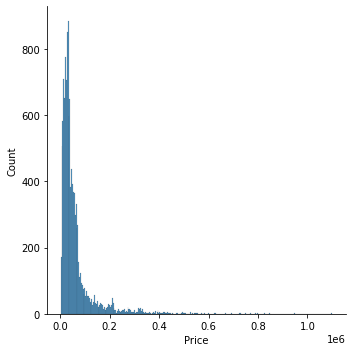

In [6]:
sns.displot(df['Price'])

Price shows a right skewed distribution which would violate our test assumptions

##### Does log transforming our price variable fix its skewness?

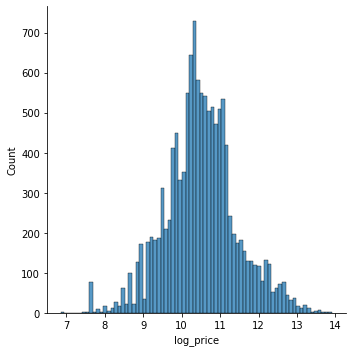

In [7]:
df['log_price'] = np.log(df['Price'])
sns.displot(df['log_price'])

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='log_price', ylabel='Density'>

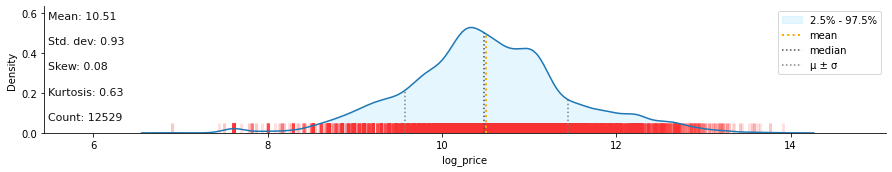

In [8]:
klib.dist_plot(df['log_price'])

log_price is fairly symetrically distributed

## Equal Variance Among Groups

##### Is our assumption of Homoscedasticity violed?

<AxesSubplot:xlabel='Transmission', ylabel='log_price'>

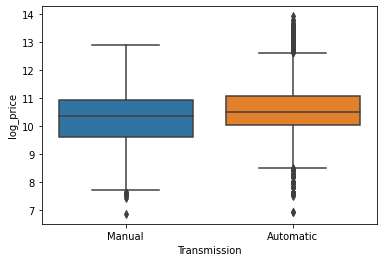

In [20]:
sns.boxplot(x = 'Transmission',y = 'log_price',data=df)

##### Perform Bartlett's test for equal variances or levene's test

In [21]:
from scipy.stats import f_oneway,bartlett,kruskal,levene

In [22]:
auto = df[df['Transmission']=='Automatic']['log_price'].values
manual = df[df['Transmission']=='Manual']['log_price'].values

In [23]:
bartlett(auto,manual)

BartlettResult(statistic=8.71274134747294, pvalue=0.00315993674474046)

In [24]:
levene(auto,manual)

LeveneResult(statistic=40.02127353144143, pvalue=2.597637648864694e-10)

##### Homoscedasticity Conclusion
Since Bartlett's test tests the null hypothesis that all input samples
are from populations with equal variances and our p-value < 0.05 we reject the null hypothesis and conclude our samples have unequal variance

##### Using the Kruskal-Wallis Test (Nonparametric) instead of a One-Way Anova as assumptions violated

In [25]:
kruskal(auto,manual)

KruskalResult(statistic=138.36507715966894, pvalue=6.063845076317214e-32)

### Conclusion

Since our p-value < 0.05 we reject the null hypothesis. There is statistical evidence that transmission type influences price

In [98]:
df['Drive'].value_counts()

Front    5157
Rear     3193
AWD      2202
4WD      1953
Other      24
Name: Drive, dtype: int64

## Task 2
Is there statistically significant difference between the mean fuel consumption of with repsect to Drive type at a significance level of 95%

#### At first instance the mean fuel consumption seems to be difference among  Drive Type

In [26]:
df1 = df[['Drive','Fuel_consumption']]
df1 = df1[df['Drive']!='Other']
df1.groupby(['Drive']).mean()['Fuel_consumption']

Drive
4WD      8.178187
AWD      7.100363
Front    6.074268
Rear     5.431882
Name: Fuel_consumption, dtype: float64

##### What is the sample size of each category?

In [27]:
df1['Drive'].value_counts()

Front    5157
Rear     3193
AWD      2202
4WD      1953
Name: Drive, dtype: int64

We have unequal sample sizes among our Drive types but fairly large groups sizes

##### Is fuel consumption normally distributed?

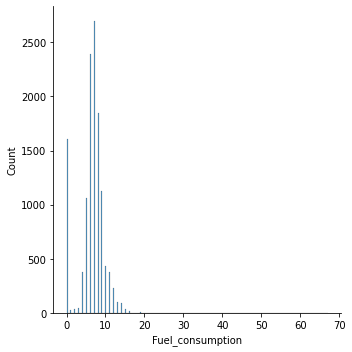

In [120]:
sns.displot(df1['Fuel_consumption'])

In [119]:
df1['Fuel_consumption'].value_counts().head(5)

7.0    2697
6.0    2391
8.0    1846
0.0    1604
9.0    1126
Name: Fuel_consumption, dtype: int64

#### We clearly have some 0 values that need to be explored

In [124]:
df[df['Fuel_consumption']==0].head(5)

,Price,Vehicle,Doors,Seats,Colour,Kilometres,Body,Transmission,Drive,Fuel_type,Engine,Fuel_consumption,Year,log_price
212,29490.0,MG,5.0,5.0,blue,-,SUV,Automatic,Front,Unleaded,3.0,0.0,2020.0,10.291807
213,29490.0,MG,5.0,5.0,white,-,SUV,Automatic,Front,Unleaded,3.0,0.0,2020.0,10.291807
258,99888.0,BMW,2.0,4.0,silver,11512,Coupe,Automatic,Rear,Premium,6.0,0.0,2018.0,11.511805
313,32490.0,MG,5.0,5.0,blue,-,SUV,Automatic,Front,Unleaded,3.0,0.0,2020.0,10.388688
315,29490.0,MG,5.0,5.0,red,-,SUV,Automatic,Front,Unleaded,3.0,0.0,2020.0,10.291807


These predominantly are missing Kilometers and Fuel_consumption which we would probably leave out in our prediction modelling

In [127]:
df1 = df1[df1['Fuel_consumption']!=0]

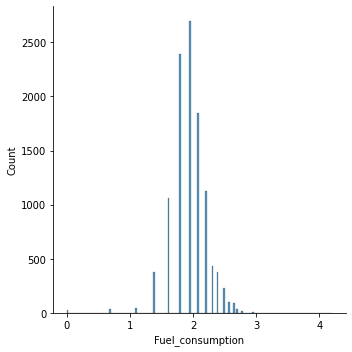

In [132]:
sns.displot(np.log(df1['Fuel_consumption']))

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Fuel_consumption', ylabel='Density'>

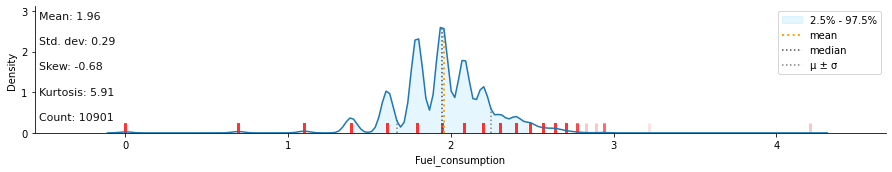

In [130]:
klib.dist_plot(np.log(df1['Fuel_consumption']))

##### Is our assumption of Homoscedasticity violed?

<AxesSubplot:xlabel='Drive', ylabel='log_Fuel_consumption'>

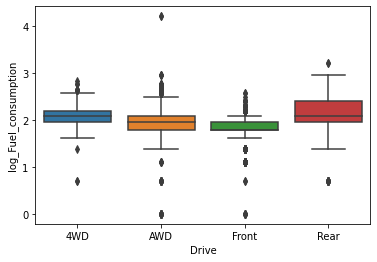

In [156]:
df1['log_Fuel_consumption'] = np.log(df1['Fuel_consumption'])
sns.boxplot(y = 'log_Fuel_consumption',x = 'Drive',data=df1)

##### Perform Bartlett's test for equal variances or levene's test

In [157]:
Four_wd= df1[df1['Drive']=='4WD']['log_Fuel_consumption'].values
AWD = df1[df1['Drive']=='AWD']['log_Fuel_consumption'].values
Front = df1[df1['Drive']=='Front']['log_Fuel_consumption'].values
Rear = df1[df1['Drive']=='Rear']['log_Fuel_consumption'].values

In [160]:
bartlett(Four_wd,AWD,Front,Rear)

BartlettResult(statistic=1146.4262547744731, pvalue=3.08101118279293e-248)

##### Homoscedasticity Conclusion
Since Bartlett's test tests the null hypothesis that all input samples
are from populations with equal variances and our p-value < 0.05 we reject the null hypothesis and conclude our samples have unequal variance

##### Using the Kruskal-Wallis Test (Nonparametric) instead of a One-Way Anova as assumptions violated

In [161]:
kruskal(Four_wd,AWD,Front,Rear)

KruskalResult(statistic=3102.676217471928, pvalue=0.0)

### Conclusion

We rejct the null hypothesis.

Our test above does not tell us which groups are different from each other. It simply tells us that not all of the group means are equal. In order to find out exactly which groups are different from each other, we must conduct a post-hoc test.

### Post hoc test

The Tukey’s Test allows us to make pairwise comparisons between the means of each group while controlling for the family-wise error rate.

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [48]:
df1.head()

,Drive,Fuel_consumption
0,4WD,8.0
1,4WD,8.0
2,AWD,6.0
3,Front,7.0
4,4WD,7.0


In [49]:
tukey = pairwise_tukeyhsd(endog=df1['Fuel_consumption'],
                          groups=df1['Drive'],
                          alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   4WD    AWD  -1.0778 0.001 -1.3249 -0.8307   True
   4WD  Front  -2.1039 0.001 -2.3151 -1.8927   True
   4WD   Rear  -2.7463 0.001 -2.9747  -2.518   True
   AWD  Front  -1.0261 0.001 -1.2285 -0.8237   True
   AWD   Rear  -1.6685 0.001 -1.8887 -1.4483   True
 Front   Rear  -0.6424 0.001 -0.8214 -0.4634   True
---------------------------------------------------


### Post Hoc Conclusion

We would thus conclude that there is a statistically significant difference between the means of all our Drive groups